In [1]:
Asmall=[[1.0 0.0]; [0.0 1.0]]
Bsmall=Asmall

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [2]:
function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

naive_multiplication (generic function with 1 method)

In [3]:
naive_multiplication(Asmall,Bsmall)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [4]:
function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(A,1)
    for k=1:size(B,2)
        for i=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

better_multiplication (generic function with 1 method)

In [6]:
better_multiplication(Asmall, Bsmall)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [5]:
naive_times = Array{Float64}(undef, 10)
better_times = Array{Float64}(undef, 10)
BLAS_times = Array{Float64}(undef, 10)
j = 1
for i = 10:10:100
    A = rand(i, i)
    B = rand(i, i)
    naive_times[j] = @elapsed naive_multiplication(A,B)
    better_times[j] = @elapsed better_multiplication(A,B)
    BLAS_times[j] = @elapsed A*B
    j += 1 
end

print(naive_times)
print(better_times)
print(BLAS_times)

[1.9e-5, 2.26e-5, 7.9799e-5, 0.000207498, 0.000465497, 0.000777795, 0.00119809, 0.00191859, 0.00253528, 0.00361037][2.1e-6, 1.5e-5, 4.85e-5, 0.000127199, 0.000236998, 0.000406197, 0.000622995, 0.000893694, 0.00112959, 0.00152449][0.000525296, 4.9e-6, 9.9e-6, 1.16e-5, 2.08e-5, 2.68e-5, 0.000706696, 0.000576796, 8.2899e-5, 9.3399e-5]

In [6]:
using DataFrames 
df = DataFrame()
df[:Col1] = naive_times
df[:Col2] = better_times

10-element Array{Float64,1}:
 2.1e-6     
 1.5e-5     
 4.85e-5    
 0.000127199
 0.000236998
 0.000406197
 0.000622995
 0.000893694
 0.001129592
 0.00152449 

In [11]:
df

,Col1,Col2
,Float64,Float64
1,3.9501e-5,2.6e-6
2,2.39e-5,1.63e-5
3,8.12e-5,5.42e-5
4,0.000256702,0.0001263
5,0.000424602,0.000238002
6,0.000770003,0.000451903
7,0.00121431,0.000650203
8,0.00185971,0.000881904
9,0.00264611,0.00126371


In [7]:
using Statistics 
v1 = var(naive_times)
v2 = var(better_times)
v3 = var(BLAS_times)

7.789647905671111e-8

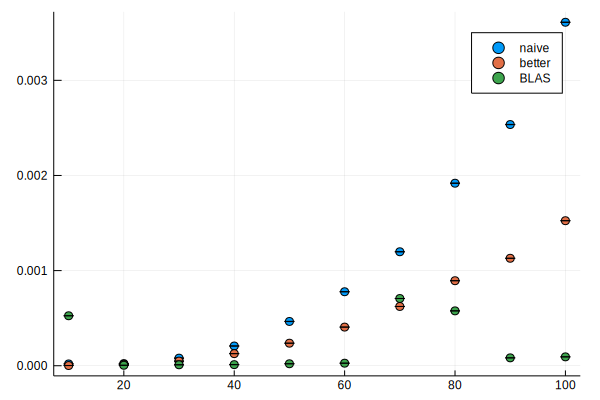

In [8]:
using Plots
scatter(10:10:100, [naive_times, better_times, BLAS_times],label=["naive" "better" "BLAS"], yerr= [v1 v2 v3])

In [8]:
using CSV
input="datalab3.csv"
mydata=CSV.read(input, delim=";")

,size,naive,better,blas
,Int64⍰,Float64⍰,Float64⍰,Float64⍰
1,10,1.9e-5,1.9e-5,2.3e-5
2,10,1.8e-5,1.9e-5,8.0e-6
3,10,1.9e-5,1.8e-5,8.0e-6
4,10,1.8e-5,1.8e-5,8.0e-6
5,10,2.0e-5,1.9e-5,9.0e-6
6,10,1.7e-5,1.8e-5,8.0e-6
7,10,1.9e-5,1.8e-5,9.0e-6
8,10,1.9e-5,1.8e-5,1.0e-5
9,10,2.0e-5,1.8e-5,9.0e-6


In [9]:
using Statistics 
using DataFrames
dataset = by(mydata, :size) do df
          DataFrame(naive_m = mean(df.naive), better_m = mean(df.better), BLAS_m = mean(df.blas))
       end

UndefVarError: UndefVarError: mydata not defined

In [12]:
using Statistics 
v1_C = var(dataset[:naive_m])
v2_C = var(dataset[:better_m])
v3_C = var(dataset[:BLAS_m])

4.198771937777776e-7

In [10]:
using Plots
scatter(10:10:100, [dataset[:naive_m],dataset[:better_m],dataset[:BLAS_m] ],
                    label=["naive" "better" "BLAS"], yerr= [v1_C v2_C v3_C])

UndefVarError: UndefVarError: dataset not defined

In [14]:
using CSV
input="datalab3_0.csv"
mydata_o=CSV.read(input, delim=";")

,size,naive,better,blas
,Int64⍰,Float64⍰,Float64⍰,Float64⍰
1,10,8.0e-6,6.0e-6,3.5e-5
2,10,8.0e-6,6.0e-6,1.3e-5
3,10,8.0e-6,7.0e-6,1.5e-5
4,10,8.0e-6,7.0e-6,1.2e-5
5,10,4.3e-5,7.0e-6,1.2e-5
6,10,8.0e-6,7.0e-6,1.3e-5
7,10,8.0e-6,6.0e-6,1.3e-5
8,10,8.0e-6,6.0e-6,1.3e-5
9,10,9.0e-6,7.0e-6,1.4e-5


In [15]:
using Statistics 
using DataFrames
dataset_o = by(mydata_o, :size) do df
          DataFrame(naive_m = mean(df.naive), better_m = mean(df.better), BLAS_m = mean(df.blas))
       end

,size,naive_m,better_m,BLAS_m
,Int64⍰,Float64,Float64,Float64
1,10,1.17e-5,6.7e-6,1.54e-5
2,20,7.83e-5,4.23e-5,7.39e-5
3,30,0.000129,6.44e-5,0.0001115
4,40,0.0002407,9.87e-5,0.0001681
5,50,0.0004233,0.0002133,0.0003057
6,60,0.0007595,0.0003392,0.0004914
7,70,0.0011082,0.0004696,0.000799
8,80,0.0016602,0.0006549,0.0011877
9,90,0.0023192,0.0008838,0.0013782


In [16]:
using Statistics 
v1_C_o = var(dataset_o[:naive_m])
v2_C_o = var(dataset_o[:better_m])
v3_C_o = var(dataset_o[:BLAS_m])

4.295848382222222e-7

In [11]:
using Plots
scatter(10:10:100, [dataset_o[:naive_m],dataset_o[:better_m],dataset_o[:BLAS_m], dataset[:naive_m],dataset[:better_m],dataset[:BLAS_m] ],
                    label=["naive_o" "better_o" "BLAS_o" "naive" "better" "BLAS"], yerr= [v1_C_o v2_C_o v3_C_o v1_C v2_C v3_C]) 


UndefVarError: UndefVarError: dataset_o not defined

In [13]:
using Polynomials
xs = 10:10:100
fit_naive=polyfit(xs,naive_times,3)
fit_better=polyfit(xs, better_times, 3)
fit_blas = polyfit(xs, BLAS_times, 3)
println(fit_naive)
println(fit_better)

Poly(3.1677433333333566e-5 - 2.7170165695415893e-6*x + 5.488111305361347e-8*x^2 + 3.2724588189588164e-9*x^3)
Poly(3.8829499999999476e-5 - 5.080268861693823e-6*x + 1.7186645104895028e-7*x^2 + 2.630609945609987e-10*x^3)


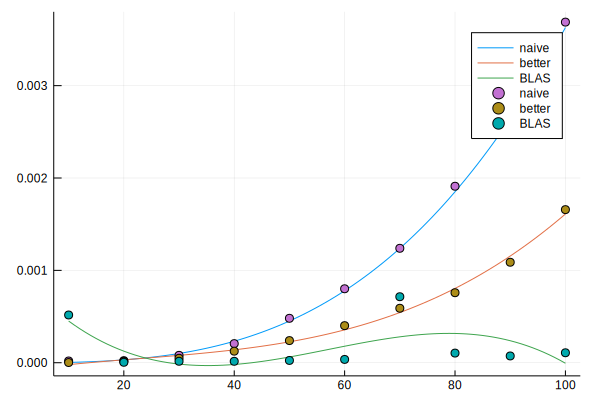

In [20]:
using Plots

# geste punkty do wyliczenia wartosci wielomianu aproksymujacego:
xd=10:1:100
# wykres wartosci wielomianu dla gestych punktow:
plot(xd,polyval(fit_naive, xd), label = "naive")
plot!(xd,polyval(fit_better, xd), label = "better")
plot!(xd,polyval(fit_blas, xd),label = "BLAS")

# ! -dodanie do tego samego wykresu punktów wg ktorych aproksymowalismy
scatter!(xs,naive_times, label = "naive")
scatter!(xs, better_times, label = "better")
scatter!(xs, BLAS_times, label = "BLAS")

In [36]:
using Polynomials
xs = 10:10:100
fit_naive_c=polyfit(xs,dataset[:naive_m],3)
fit_better_c=polyfit(xs, dataset[:better_m], 3)
fit_blas_c = polyfit(xs, dataset[:BLAS_m], 3)

Poly(-1.8139999999999925e-5 + 3.899965034965031e-6*x - 6.327797202797196e-8*x^2 + 2.1861888111888105e-9*x^3)

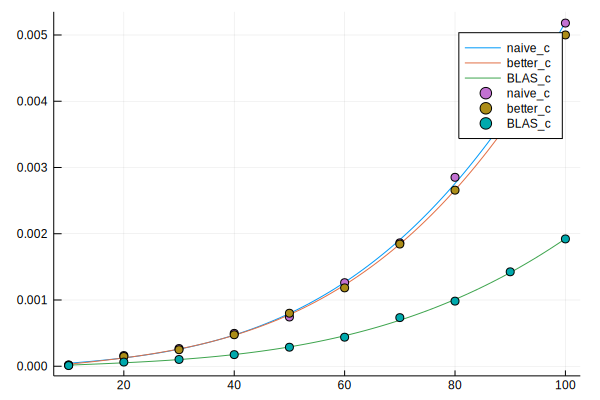

In [37]:
# geste punkty do wyliczenia wartosci wielomianu aproksymujacego:
xd=10:1:100
# wykres wartosci wielomianu dla gestych punktow:
plot(xd,polyval(fit_naive_c, xd), label = "naive_c")
plot!(xd,polyval(fit_better_c, xd), label = "better_c")
plot!(xd,polyval(fit_blas_c, xd),label = "BLAS_c")

# ! -dodanie do tego samego wykresu punktów wg ktorych aproksymowalismy
scatter!(xs,dataset[:naive_m], label = "naive_c")
scatter!(xs,dataset[:better_m], label = "better_c")
scatter!(xs,dataset[:BLAS_m], label = "BLAS_c")